In [1]:
# Import and check verson of Tesnorflow
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
#Import the Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Raj Chauhan\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

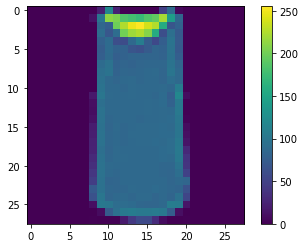

In [10]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Scale these values to a range of 0 to 1 before feeding them 
#to the neural network model. 
#To do so, divide the values by 255. 
#It's important that the training set and the testing set be 
#preprocessed in the same way:

train_images = train_images / 255.0

test_images = test_images / 255.0

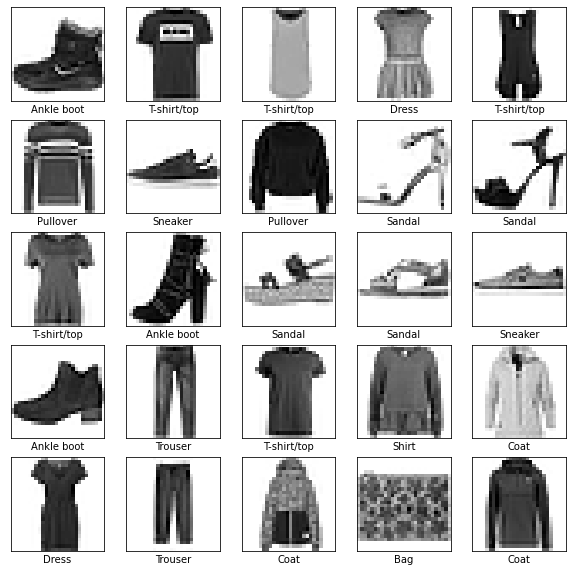

In [12]:
#To verify that the data is in the correct format and 
#that you're ready to build and train the network, 
#let's display the first 25 images from the training set and 
#display the class name below each image.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4973 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3711 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3318 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2926 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2659 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2588 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2494 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3332 - accuracy: 0.8810 - 844ms/epoch - 3ms/step

Test accuracy: 0.8809999823570251


Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([3.4273352e-08, 2.1374034e-09, 5.4641781e-08, 1.6088731e-09,
       2.2142387e-08, 1.9005169e-03, 9.3296890e-09, 2.6526561e-03,
       1.3957994e-07, 9.9544650e-01], dtype=float32)

In [20]:
import numpy as np
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

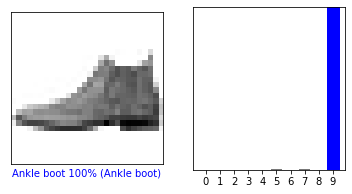

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

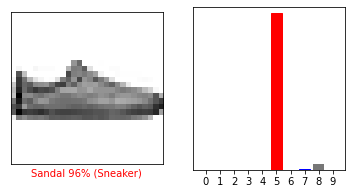

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

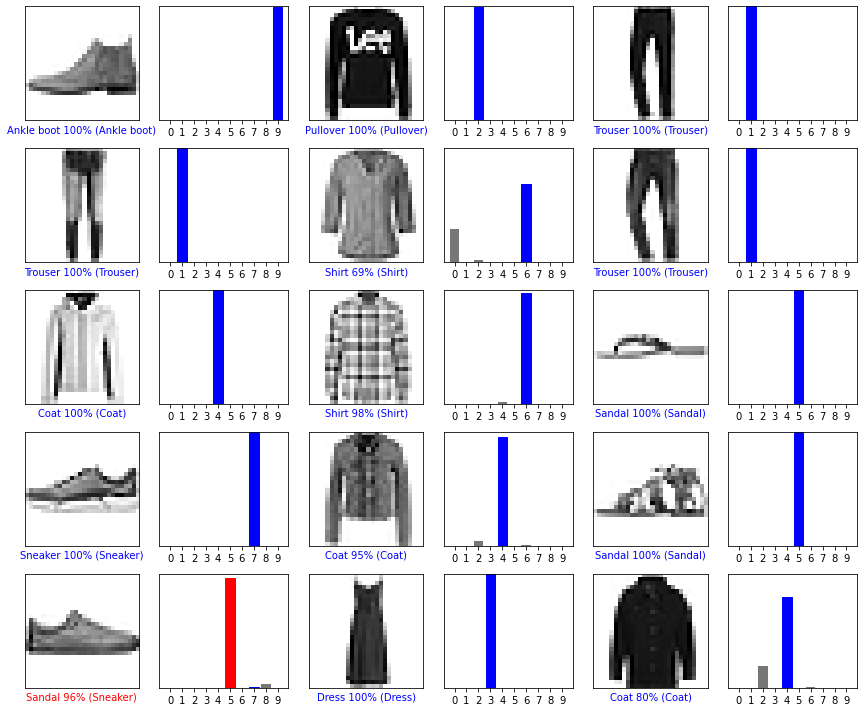

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[4.1303949e-05 1.8242314e-13 9.9815494e-01 2.3640304e-12 1.4600405e-03
  4.0348402e-13 3.4371819e-04 5.6553315e-19 3.2895846e-11 4.0146356e-13]]


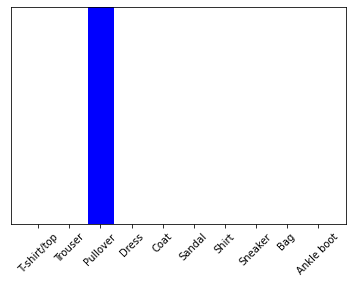

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2